In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import data_import
import country_converter as coco
import plotly.graph_objects as go


In [4]:
rest_df = data_import.get_rest_countries()

In [5]:
cia_df = data_import.get_cia_data()

In [6]:
merged_data = pd.merge(rest_df, cia_df, how = 'inner', on = 'ISO3')

In [7]:
merged_data.head()

,country_x,ISO3,region,sub-region,latitude,longitude,borders,regional_bloc,country_y,population,internet_users,internet_%_of_population,internet_global_rank,telephones_fixed_lines,telephone_mobile_cellular,median_age,gdp_purchasing_power_parity,gdp_global_rank,education_expenditures,education_expeditures_global_rank
0,Afghanistan,AFG,Asia,Southern Asia,33,65,"[IRN, PAK, TKM, UZB, TJK, CHN]",South Asian Association for Regional Cooperation,Afghanistan,34940837.0,3531770.0,10.6,NaN,118769,23929713.0,19.0,6.945000e+10,101.0,3.9,111.0
1,Albania,ALB,Europe,Southern Europe,41,20,"[MNE, GRC, MKD, KOS]",Central European Free Trade Agreement,Albania,3057220.0,2016516.0,66.4,110.0,247010,3497950.0,33.4,3.601000e+10,125.0,4.0,108.0
2,Algeria,DZA,Africa,Northern Africa,28,3,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",African Union,Algeria,41657488.0,17291463.0,42.9,36.0,3130090,49873389.0,28.3,6.300000e+11,36.0,NaN,NaN
3,American Samoa,ASM,Oceania,Polynesia,-14.3333,-170,[],None,American Samoa,50826.0,17000.0,31.3,205.0,10000,NaN,26.1,6.580000e+08,209.0,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,42.5,1.5,"[FRA, ESP]",None,Andorra,85708.0,83887.0,97.9,177.0,38411,80337.0,44.9,3.327000e+09,186.0,3.2,132.0


In [8]:
merged_data = merged_data[['ISO3',
                           'country_y',
                           'region',
                           'sub-region',
                           'latitude',
                           'longitude',
                           'borders',
                           'population',
                           'internet_users',
                           'internet_%_of_population',
                           'median_age',
                           'gdp_purchasing_power_parity',
                           'education_expenditures']]

In [9]:
merged_data.head()

,ISO3,country_y,region,sub-region,latitude,longitude,borders,population,internet_users,internet_%_of_population,median_age,gdp_purchasing_power_parity,education_expenditures
0,AFG,Afghanistan,Asia,Southern Asia,33,65,"[IRN, PAK, TKM, UZB, TJK, CHN]",34940837.0,3531770.0,10.6,19.0,6.945000e+10,3.9
1,ALB,Albania,Europe,Southern Europe,41,20,"[MNE, GRC, MKD, KOS]",3057220.0,2016516.0,66.4,33.4,3.601000e+10,4.0
2,DZA,Algeria,Africa,Northern Africa,28,3,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",41657488.0,17291463.0,42.9,28.3,6.300000e+11,NaN
3,ASM,American Samoa,Oceania,Polynesia,-14.3333,-170,[],50826.0,17000.0,31.3,26.1,6.580000e+08,NaN
4,AND,Andorra,Europe,Southern Europe,42.5,1.5,"[FRA, ESP]",85708.0,83887.0,97.9,44.9,3.327000e+09,3.2


<h1> Josh's Workspace </h1>

In [10]:
pop_low = merged_data["population"].quantile(0.1)
pop_hi  = merged_data["population"].quantile(0.9)
edu_low = merged_data['education_expenditures'].quantile(0.01)
edu_hi = merged_data['education_expenditures'].quantile(0.99)


df_filtered = merged_data[(merged_data["population"] < pop_hi) & (merged_data["population"] > pop_low) & (merged_data['education_expenditures'] > edu_low) & (merged_data['education_expenditures'] < edu_hi)]

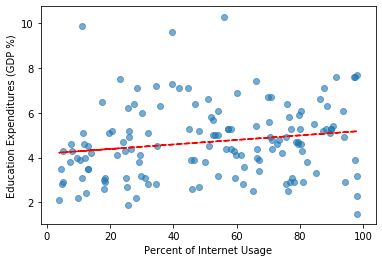

In [11]:
z = np.polyfit(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], 1)
p = np.poly1d(z)

plt.plot(df_filtered['internet_%_of_population'],p(df_filtered['internet_%_of_population']),"r--")
plt.scatter(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], alpha = .6)
plt.xlabel('Percent of Internet Usage')
plt.ylabel('Education Expenditures (GDP %)')

plt.show()

In [12]:
sub_df = df_filtered[['sub-region', 'internet_%_of_population', 'median_age', 'education_expenditures']]

In [13]:
sub_df = sub_df.groupby('sub-region').mean()

In [14]:
sub_df.head()

,internet_%_of_population,median_age,education_expenditures
sub-region,,,
Australia and New Zealand,88.350000,38.450000,5.800000
Caribbean,64.366667,34.358333,5.000000
Central America,40.385714,26.357143,4.942857
Central Asia,39.320000,27.980000,4.940000
Eastern Africa,23.500000,21.538462,4.446154


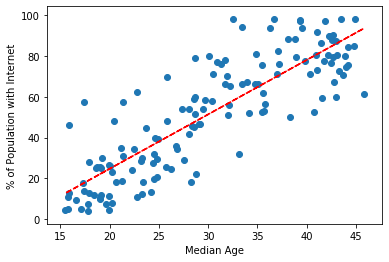

In [15]:
z_trend = np.polyfit(df_filtered['median_age'], df_filtered['internet_%_of_population'], 1)
p_trend = np.poly1d(z_trend)

plt.plot(df_filtered['median_age'],p_trend(df_filtered['median_age']),"r--")
plt.scatter(df_filtered['median_age'], df_filtered['internet_%_of_population'])
plt.xlabel('Median Age')
plt.ylabel('% of Population with Internet')
plt.show()

<h1>Daniela's Workspace</h1>

In [16]:
world = merged_data.loc[merged_data.ISO3.str.contains('World')]


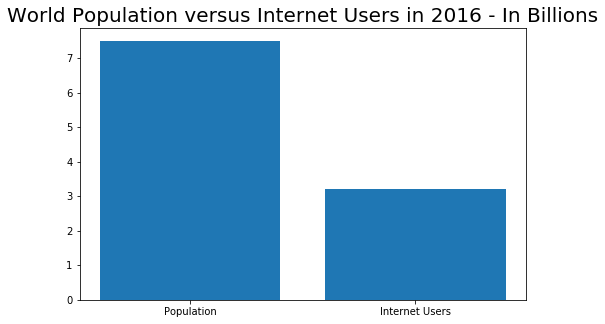

In [17]:
#plot World Population versus Internet Users
world2 = merged_data.iloc[226]
round_population = round(world2.population/1000000000,1)
round_users = round(world2.internet_users/1000000000,1)
data = {'Population': round_population, 'Internet Users': round_users}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharey=False)
axs.bar(names, values)
plt.title("World Population versus Internet Users in 2016 - In Billions",fontsize= 20)
plt.show()

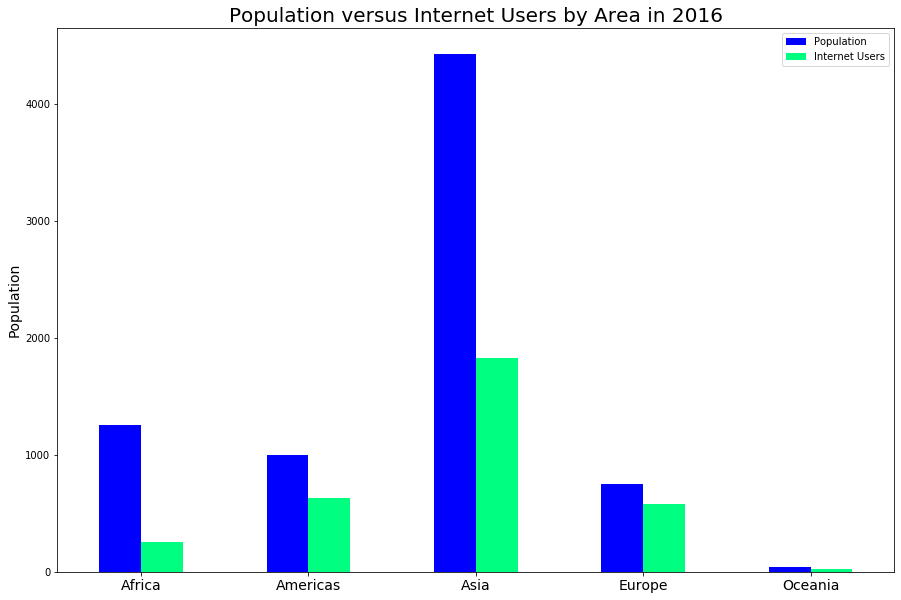

In [22]:
# Population versus Internet users by area
per_sub_area = (merged_data[['region', 'population', 'internet_users']]).groupby(['region']).sum()
per_sub_area = per_sub_area.drop('World')
per_sub_area = per_sub_area.drop('Polar')


per_sub_area = round(per_sub_area/1000000,2)
#plot
per_sub_area.plot(kind="bar",
                  colormap='winter',
                  figsize=(15,10)
                 )
plt.title('Population versus Internet Users by Area in 2016', fontsize=20)
plt.ylabel("Population", fontsize=14)
plt.xlabel('')
plt.legend(['Population', "Internet Users"]);
plt.xticks(rotation =0,fontsize =14)
plt.show()

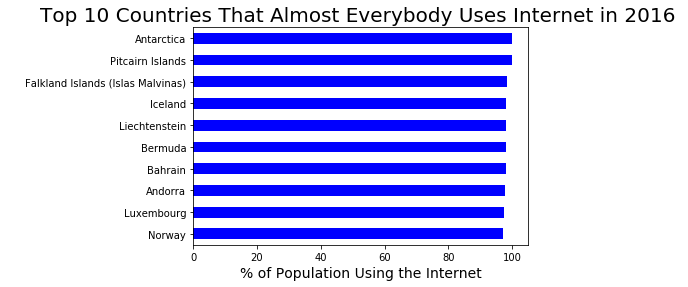

In [23]:
# What countries have almost 100% of their population using the Internet?
top_perc_internet_population = merged_data[['country_y', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=False)\
                            .head(10)\
                            .sort_values(by=['internet_%_of_population'], ascending=True)\
                            .set_index('country_y')
top_perc_internet_population.plot(kind='barh',
                                 legend=False,
                                 colormap='winter'
                             )
plt.title("Top 10 Countries That Almost Everybody Uses Internet in 2016 ", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)
plt.ylabel(' ',fontsize=14)
plt.show()

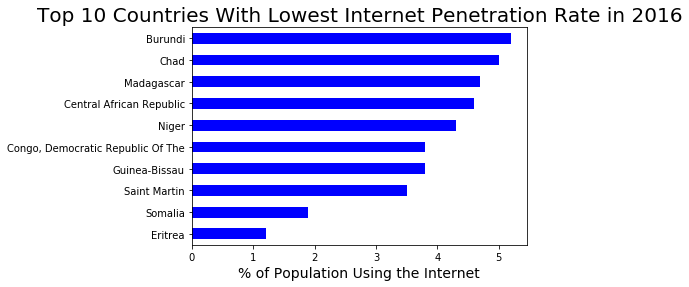

In [24]:
# What countries have the lowest Internet penetration rate in 2016?
less_perc_internet_population = merged_data[['country_y', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=True)\
                            .head(10)\
                            .set_index('country_y')
less_perc_internet_population.plot(kind='barh',
                                   legend=None,
                                   colormap='winter')
plt.title("Top 10 Countries With Lowest Internet Penetration Rate in 2016", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)
plt.ylabel('')
plt.show()

<h1>Cesar's Workspace</h1>

<h1>Color Map</h1>

In [ ]:
maps_df = merged_data[['country_y', 'internet_%_of_population', 'ISO3']]

fig = go.Figure(data=go.Choropleth(
    locations = maps_df['ISO3'],
    z = maps_df['internet_%_of_population'],
    text = maps_df['country_y'],
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgrey',
    marker_line_width=0.9,
    colorbar_title = 'Internet % of Population',
))

fig.update_layout(
    title_text='Global Internet Usage by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
#     annotations = [dict(
#         x=0.55,
#         y=0.1,
#         xref='paper',
#         yref='paper',
#         text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
#             CIA World Factbook</a>',
#         showarrow = False
#     )]
)

fig.show()

<h1>Cleaned Data Output</h1>

In [18]:
merged_data.columns = merged_data.columns.str.title().str.replace('_', ' ')
merged_data = merged_data.rename(columns = {'Iso3': 'ISO3', 'Country Y': 'Country'})

In [19]:
merged_data.head()

,ISO3,Country,Region,Sub-Region,Latitude,Longitude,Borders,Population,Internet Users,Internet % Of Population,Median Age,Education Expenditures
0,AFG,Afghanistan,Asia,Southern Asia,33,65,"[IRN, PAK, TKM, UZB, TJK, CHN]",34940837.0,3531770.0,10.6,19.0,3.9
1,ALB,Albania,Europe,Southern Europe,41,20,"[MNE, GRC, MKD, KOS]",3057220.0,2016516.0,66.4,33.4,4.0
2,DZA,Algeria,Africa,Northern Africa,28,3,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",41657488.0,17291463.0,42.9,28.3,NaN
3,ASM,American Samoa,Oceania,Polynesia,-14.3333,-170,[],50826.0,17000.0,31.3,26.1,NaN
4,AND,Andorra,Europe,Southern Europe,42.5,1.5,"[FRA, ESP]",85708.0,83887.0,97.9,44.9,3.2


In [20]:
merged_data.to_csv('new_merged.csv')